In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pickle

In [3]:
liver =pd.read_csv('/content/indian_liver_patient - indian_liver_patient.csv')
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
liver.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
liver.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [7]:
median_liver = liver['Albumin_and_Globulin_Ratio'].median()
liver['Albumin_and_Globulin_Ratio'].fillna(median_liver, inplace=True)

/tmp/ipython-input-4243606853.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  liver['Albumin_and_Globulin_Ratio'].fillna(median_liver, inplace=True)


In [8]:
liver.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
578,False
579,False
580,False
581,False


In [9]:
liver_cleaned = liver.drop_duplicates(keep='first').reset_index(drop=True)

In [10]:
liver_cleaned.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
565,False
566,False
567,False
568,False


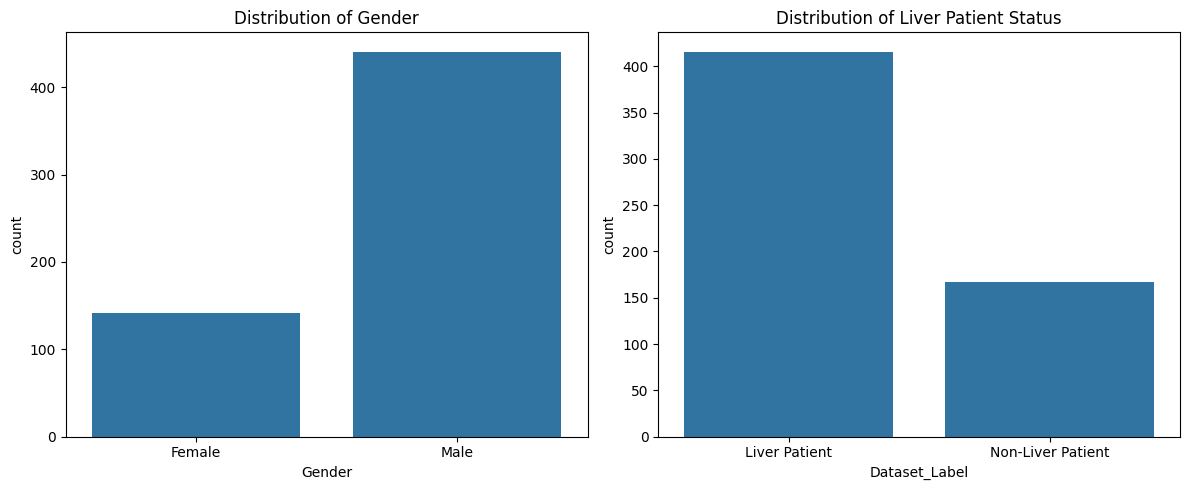

In [11]:
categorical_cols = ['Gender', 'Dataset']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=liver)
plt.title('Distribution of Gender')

plt.subplot(1, 2, 2)
liver['Dataset_Label'] = liver['Dataset'].map({1: 'Liver Patient', 2: 'Non-Liver Patient'})
sns.countplot(x='Dataset_Label', data=liver)
plt.title('Distribution of Liver Patient Status')

plt.tight_layout()

In [13]:
liver = pd.get_dummies(liver, columns=['Gender'], drop_first=True)

In [15]:
liver['Dataset'] = liver['Dataset'].map({1: 1, 2: 0})

In [32]:
x = liver.drop(['Dataset', 'Dataset_Label'], axis=1)
y = liver['Dataset']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

In [34]:
numerical_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

In [35]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 110 to 263
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         437 non-null    float64
 1   Total_Bilirubin             437 non-null    float64
 2   Direct_Bilirubin            437 non-null    float64
 3   Alkaline_Phosphotase        437 non-null    float64
 4   Alamine_Aminotransferase    437 non-null    float64
 5   Aspartate_Aminotransferase  437 non-null    float64
 6   Total_Protiens              437 non-null    float64
 7   Albumin                     437 non-null    float64
 8   Albumin_and_Globulin_Ratio  437 non-null    float64
 9   Gender_Male                 437 non-null    bool   
dtypes: bool(1), float64(9)
memory usage: 34.6 KB


In [36]:
x_train

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
110,-1.262236,-0.453859,-0.453896,-0.424051,-0.372984,-0.415993,-0.909510,-1.069808,-0.761589,False
496,-1.262236,-0.393513,-0.453896,-0.420157,-0.164986,-0.324482,1.390582,2.073724,1.793795,True
240,0.232270,-0.453859,-0.453896,-0.513614,-0.266449,-0.328840,1.390582,1.067794,0.176463,True
474,-0.577254,-0.192361,-0.101304,-0.276077,-0.261376,0.128716,-0.449492,-0.566843,-0.470470,True
401,0.356812,0.873747,0.917296,-0.797880,-0.205571,0.568841,0.286538,-1.949997,-2.087801,True
...,...,...,...,...,...,...,...,...,...,...
344,-0.452712,-0.433744,-0.453896,-0.396793,-0.124402,-0.285263,1.574590,2.325206,1.793795,True
498,1.477691,-0.232591,-0.336366,-0.568131,-0.337472,-0.363701,0.010527,1.067794,2.117261,True
119,-0.764067,3.026078,2.680256,0.004295,5.912602,4.115987,-1.001514,-0.692584,-0.147003,True
111,0.232270,0.049022,0.094580,-0.155361,-0.261376,0.045920,-0.725503,-1.195549,-1.052709,True


In [37]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

model = LogisticRegression(random_state=42)
model.fit(x_train_resampled, y_train_resampled)

y_pred = model.predict(x_test)

In [38]:
liver_pickle = 'liver_data_final.pkl'
liver.to_pickle(liver_pickle)